# Introduction

# Code basis
## Dependencies

In [21]:
import SimpleITK as sitk

import math

import os
import sys
InDir = "F:/Box Sync/Research/Polarimetry/Jupyter Analysis/Polscope_BasicCorrected/Large/"
OutDir = "F:/Box Sync/Research/Polarimetry/Jupyter Analysis/Polscope_BasicCorrected/"

import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

from myshow import myshow

## Utility functions

In [12]:
def resample(image, transform):
    reference_image = image
    interpolator = sitk.sitkCosineWindowedSinc
    default_value = 0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)

In [15]:
def resizePolscopeImage(itkImg, currentRes, targetRes):
    scale = currentRes/targetRes
    affine = sitk.AffineTransform(2)
    affine.Scale((scale, scale))
    resampled = resample(itkImg, affine)
    return resampled

In [31]:
def shrinkPolscopeImage(itkImg, currentRes, targetRes):
    scale = math.floor(targetRes/currentRes)
    endRes = currentRes*scale
    shrunk = sitk.Shrink(itkImg,[scale,scale])
    shrunk.SetSpacing([endRes, endRes])
    return shrunk

# Processing

In [16]:
image = sitk.ReadImage(InDir + 'WP2.tif', sitk.sitkFloat32)

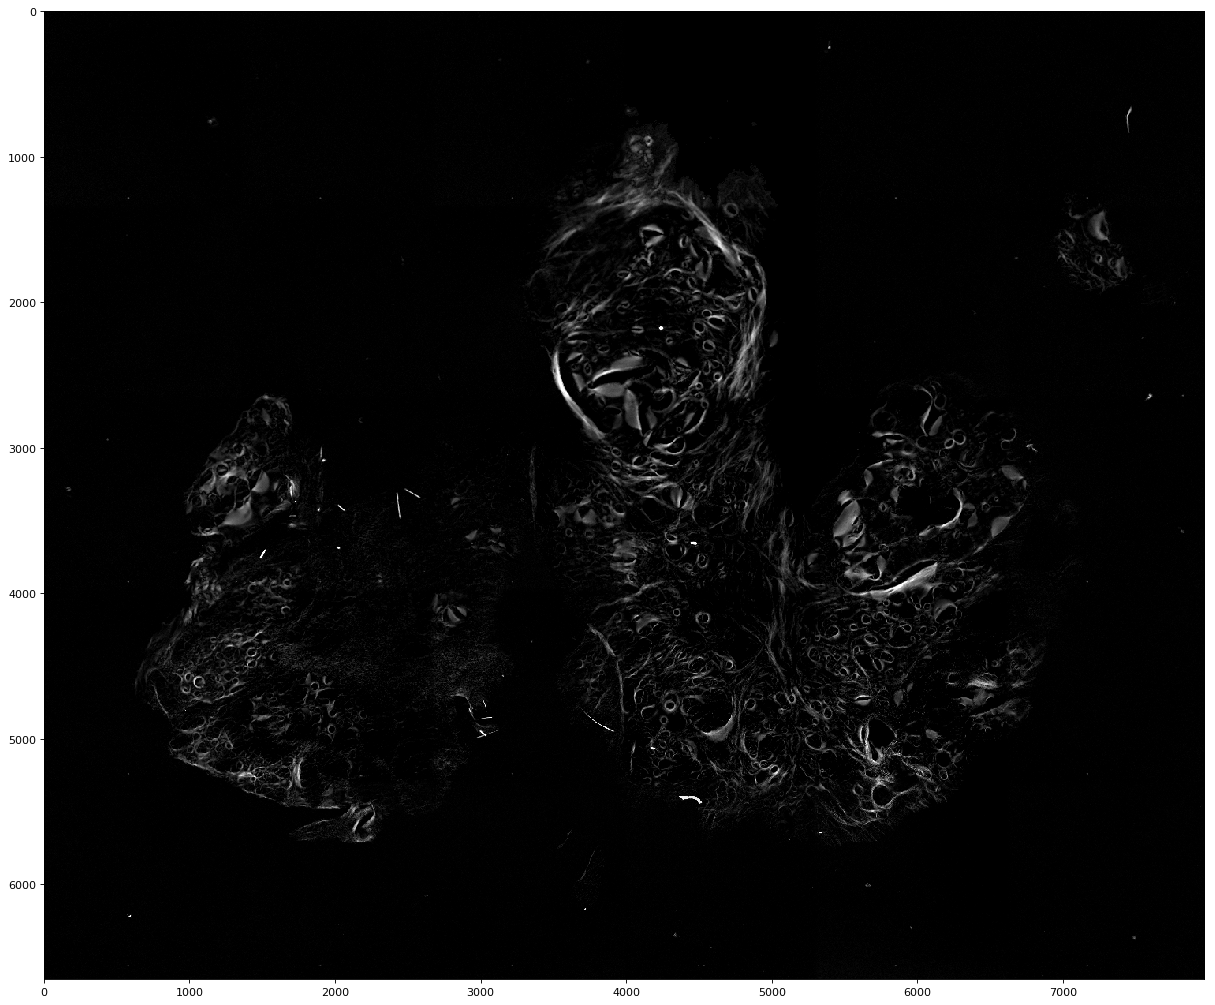

In [32]:
shrunk = shrinkPolscopeImage(image,0.677,5.57)
myshow(shrunk)